In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [0]:
from keras import utils
from keras.utils import to_categorical
import random
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM,Flatten
# import keras
# from keras_self_attention import seqselfAttention
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
import gensim
from keras.preprocessing.sequence import pad_sequences

In [0]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
train=pd.read_csv('/content/drive/My Drive/database_folder/movie-feedback/train.tsv',sep='\t')
test=pd.read_csv('/content/drive/My Drive/database_folder/movie-feedback/test.tsv',sep='\t')

In [0]:
np.dtype(train.Sentiment)

dtype('int64')

In [0]:
train['Sentiment']=train['Sentiment'].apply(str)

In [0]:
stop_words=stopwords.words("english")
lemma=WordNetLemmatizer()

In [0]:
#fuinction for data cleaning and splitting sentence into word
TEXT_CLEANING_RE="@\S,\S.\S+|https?:\S+|http?:\S\[^A-Za-z0-9]+"
def preprocess(text):
  text=re.sub(TEXT_CLEANING_RE,' ',str(text).lower()).strip()
  tokens=[]
  for token in text.split():
    if token not in stop_words:
      token=lemma.lemmatize(token)
      tokens.append(token)
  return " ".join(tokens)

  # " ".join(tokens) this command will join every element of list into a string with a "t"(t=whitespace over here)


In [0]:
train_phrase=train.Phrase.apply(lambda x:preprocess(x))
test_phrase=test.Phrase.apply(lambda x:preprocess(x))

In [0]:
train_phrase[:5]

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

In [0]:

train[:5]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
sentiment=train.Sentiment.values
y=to_categorical(sentiment)
num_classes=y.shape[1]

In [0]:
test[:5]

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:

sentimentb=test.Sentiment.values
y_test=to_categorical(sentiment)
num_classess=y_test.shape[1]

AttributeError: ignored

In [0]:
len(x_train)

124848

In [0]:
x_train,x_val,y_train,y_val=train_test_split(train_phrase,y,test_size=.2,stratify=y)

In [0]:
#ignore
# documents=[]
# max_len=0
# for x in train_phrase:
#   documents.append([x.split()])
#   if(max_len < len(x)):
#         max_len = len(x)

# for x in test_phrase:
#   documents.append([x.split()])

In [0]:

documents=[_text.split() for _text in train_phrase]

documentb=[_text.split() for _text in test_phrase]
documents.extend(documentb)

In [0]:
len(documents)

222352

In [0]:
# adding both the word of train and test
# documents.extend(documentb)


In [0]:
len(documents)
documents[:5]

[['series',
  'escapade',
  'demonstrating',
  'adage',
  'good',
  'goose',
  'also',
  'good',
  'gander',
  ',',
  'occasionally',
  'amuses',
  'none',
  'amount',
  'much',
  'story',
  '.'],
 ['series', 'escapade', 'demonstrating', 'adage', 'good', 'goose'],
 ['series'],
 [],
 ['series']]

In [0]:
W2V_SIZE=300
W2V_WINDOW=7
W2V_EPOCH=35
W2V_MIN_COUNT=10
w2v_model=gensim.models.word2vec.Word2Vec(size=W2V_SIZE,window=W2V_WINDOW,min_count=W2V_MIN_COUNT,workers=8)

In [0]:
w2v_model.build_vocab(documents)

In [0]:
words=w2v_model.wv.vocab.keys()
vocab_size=len(words)
vocab_size


12587

In [0]:
w2v_model.train(documents,total_examples=len(documents),epochs=W2V_EPOCH)

(29546019, 34664245)

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_phrase)

vocab_size=len(tokenizer.word_index)+1
vocab_size

13917

In [0]:
w2v_model.most_similar("good")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("'s", 0.31955665349960327),
 ('booth', 0.31447798013687134),
 (',', 0.31288254261016846),
 ("n't", 0.2976861000061035),
 ('.', 0.27704817056655884),
 ('clean', 0.2734633982181549),
 ('murphy', 0.27290958166122437),
 ('loaded', 0.26955676078796387),
 ('bad', 0.264308899641037),
 ('movie', 0.25713616609573364)]

In [0]:

#padding
SEQUENCE_LENGTH=300
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=SEQUENCE_LENGTH)
x_val = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen=SEQUENCE_LENGTH)

In [0]:
X_test=pad_sequences(tokenizer.texts_to_sequences(test_phrase),maxlen=SEQUENCE_LENGTH)


In [0]:
embedding_matrix=np.zeros((vocab_size,W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i]=w2v_model.wv[word]

print(embedding_matrix.shape)

(13917, 300)


In [0]:
embedding_layer=Embedding(vocab_size,W2V_SIZE,weights=[embedding_matrix],input_length=SEQUENCE_LENGTH,trainable=False)

In [0]:
model=Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100,dropout=.2,recurrent_dropout=.2))
model.add(Dense(num_classes,activation='softmax'))

model.summary()










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          4175100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 4,336,005
Trainable params: 160,905
Non-trainable params: 4,175,100
_________________________________________________________________


In [0]:

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [0]:

callbacks = [EarlyStopping(monitor='val_acc', min_delta=.001, patience=5,mode="max")]

In [0]:
len(y_train)

124848

In [0]:

#lets train 
%%time
BATCH_SIZE=5
EPOCHS=20
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath='movie_review_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='auto',
                                  period=1)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, batch_size=256, verbose=1, callbacks=callbacks)

Train on 124848 samples, validate on 31212 samples
Epoch 1/20
124848/124848 [==============================] - 266s 2ms/step - loss: 1.1255 - acc: 0.5482 - val_loss: 1.0426 - val_acc: 0.5831
Epoch 2/20
124848/124848 [==============================] - 259s 2ms/step - loss: 1.0743 - acc: 0.5691 - val_loss: 1.0181 - val_acc: 0.5928
Epoch 3/20
124848/124848 [==============================] - 257s 2ms/step - loss: 1.0502 - acc: 0.5765 - val_loss: 0.9992 - val_acc: 0.6000
Epoch 4/20
124848/124848 [==============================] - 257s 2ms/step - loss: 1.0341 - acc: 0.5850 - val_loss: 0.9841 - val_acc: 0.6031
Epoch 5/20
124848/124848 [==============================] - 256s 2ms/step - loss: 1.0234 - acc: 0.5896 - val_loss: 0.9779 - val_acc: 0.6058
Epoch 6/20
124848/124848 [==============================] - 255s 2ms/step - loss: 1.0121 - acc: 0.5931 - val_loss: 0.9674 - val_acc: 0.6097
Epoch 7/20
124848/124848 [==============================] - 255s 2ms/step - loss: 1.0044 - acc: 0.5964 - val_

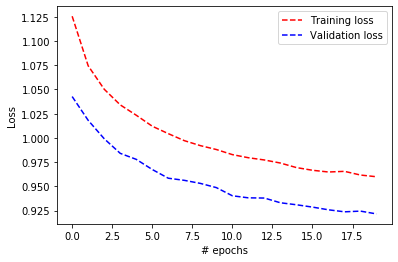

In [0]:
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel("# epochs")
plt.ylabel("Loss")
plt.show()

In [0]:
y_pred_1 = model.predict_classes(X_test)


In [0]:
y_pred_1

NameError: ignored

In [0]:
import numpy as np
np.save("saved",y_pred_1)

In [0]:
y_pred1=np.load('/saved.npy')

In [0]:
y=pd.DataFrame(y_pred1)

In [0]:
y

,0
0,2
1,2
2,2
3,2
4,2
...,...
66287,1
66288,1
66289,2
66290,2


In [0]:
sub_file=pd.read_csv('/sampleSubmission.csv',sep=',')


In [0]:
sub_file

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [0]:
for i in range(len(sub_file)):
  sub_file['Sentiment'][i]=y_pred1[i];

In [0]:
sub_file

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [0]:

sub_file.to_csv('Submission1.csv', index=False)

In [0]:
sub_file

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2
